# Лабораторная 3. Сверточная нейронная сеть

Задача - написать сверточную нейронную сеть для классификации набора данных MNIST (http://yann.lecun.com/exdb/mnist/). Файлы в формате idx не очень удобны, поэтому скачаем датасет с сайта https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz. Яном ЛеКаном была достигнута ошибка без предобучения и предобработки на его LeNet-5 на уровне 0.95%. Попробуем повторить.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [6]:
import numpy as np
import pandas as pd

Скачаем датасет и посмотрим на его размеры. У нас 60 тысяч примеров в обучающей выборке и 10 тысяч в тестовой. Размер изображения 28x28 пикселей.

In [7]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [8]:
(x_train, y_train), (x_test, y_test) = load_data('3. mnist.npz')

indices_train = np.random.permutation(1024)
x_train = x_train[indices_train]
y_train = y_train[indices_train]

indices_train = np.random.permutation(1024)
x_test = x_test[indices_train]
y_test = y_test[indices_train]

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1024, 28, 28)
(1024,)
(1024, 28, 28)
(1024,)


In [10]:
unique, counts = np.unique(y_train, return_counts=True)
df = pd.DataFrame(counts, columns=["Counts"])
df

,Counts
0,100
1,120
2,101
3,95
4,108
5,92
6,95
7,122
8,90
9,101


# Le-Net 5

In [11]:
from nn.optimizers.adam import Adam
optimizer = Adam(learning_rate=0.001, beta1=0.9, beta2=0.999)


from nn.cnn import LeNet
from nn.losses.cross_entropy import CrossEntropy

arr = np.zeros((len(y_train), 10))
arr[np.arange(len(y_train)), y_train] = 1
labels_train = arr

arr = np.zeros((len(y_test), 10))
arr[np.arange(len(y_test)), y_test] = 1
labels_test = arr


model = LeNet(num_classes=10)

loss_fn = CrossEntropy()

print("Training LeNet with CrossEntropy loss...")
history = model.train(
    x_train[:, np.newaxis][:1024], labels_train[:1024],
    x_test[:, np.newaxis][:1024], labels_test[:1024],
    epochs=10,
    batch_size=32,
    optimizer=optimizer,
    loss_fn=loss_fn,
    verbose=True
)

print("Training completed!")
print(f"Final training loss: {history['train_loss'][-1]:.4f}")
if history['val_loss']:
    print(f"Final validation loss: {history['val_loss'][-1]:.4f}")
    print(f"Final validation accuracy: {history['val_accuracy'][-1]:.4f}")

Training LeNet with CrossEntropy loss...


  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [02:14<00:00,  4.21s/it]


Epoch 1/10 - loss: 18.4385 - val_loss: 12.6006 - val_accuracy: 0.5947


100%|██████████| 32/32 [02:32<00:00,  4.78s/it]


Epoch 2/10 - loss: 7.4758 - val_loss: 9.9410 - val_accuracy: 0.6621


100%|██████████| 32/32 [02:01<00:00,  3.80s/it]


Epoch 3/10 - loss: 4.2680 - val_loss: 7.4015 - val_accuracy: 0.7363


100%|██████████| 32/32 [04:21<00:00,  8.17s/it]


Epoch 4/10 - loss: 2.7174 - val_loss: 6.5671 - val_accuracy: 0.7617


100%|██████████| 32/32 [02:42<00:00,  5.06s/it]


Epoch 5/10 - loss: 1.4986 - val_loss: 6.8847 - val_accuracy: 0.7549


100%|██████████| 32/32 [02:05<00:00,  3.92s/it]


Epoch 6/10 - loss: 1.0357 - val_loss: 6.3431 - val_accuracy: 0.7627


100%|██████████| 32/32 [02:05<00:00,  3.92s/it]


Epoch 7/10 - loss: 0.8224 - val_loss: 6.0072 - val_accuracy: 0.7793


100%|██████████| 32/32 [03:29<00:00,  6.54s/it]


Epoch 8/10 - loss: 0.6508 - val_loss: 5.7364 - val_accuracy: 0.7812


100%|██████████| 32/32 [02:30<00:00,  4.69s/it]


Epoch 9/10 - loss: 0.3255 - val_loss: 5.7529 - val_accuracy: 0.7930


100%|██████████| 32/32 [02:06<00:00,  3.94s/it]


Epoch 10/10 - loss: 0.3267 - val_loss: 5.4153 - val_accuracy: 0.7959
Training completed!
Final training loss: 0.3267
Final validation loss: 5.4153
Final validation accuracy: 0.7959


[]

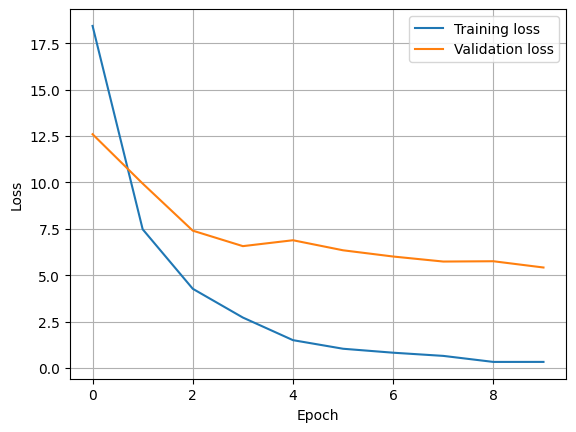

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(len(history["train_loss"])), history["train_loss"])
plt.plot(range(len(history["val_loss"])), history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.grid()
plt.plot()

[]

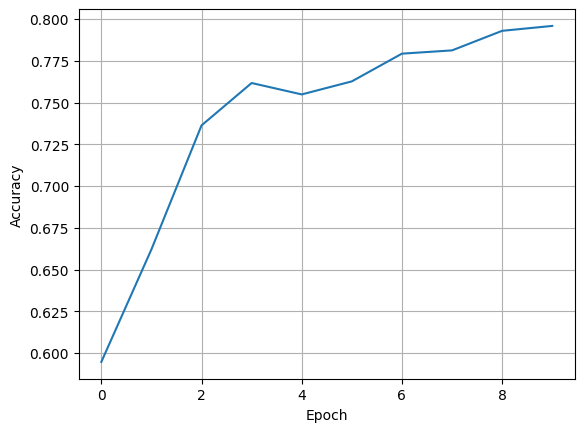

In [13]:
plt.plot(range(len(history["val_accuracy"])), history["val_accuracy"])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot()

In [14]:
from sklearn.metrics import confusion_matrix

predictions = model.forward(x_test[:, np.newaxis][:1024])

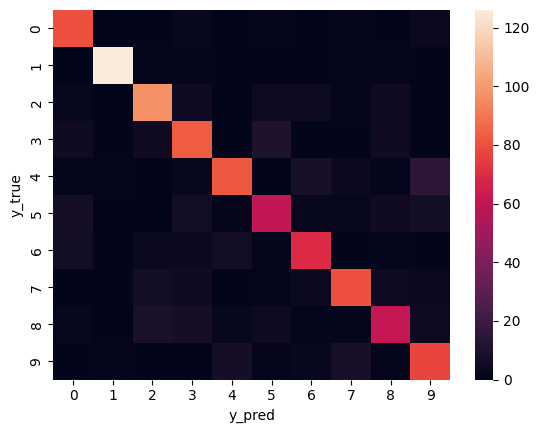

In [22]:
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)

sns.heatmap(confusion_matrix(y_test[:1024], y_pred))
plt.ylabel("y_true")
plt.xlabel("y_pred")
plt.show()

In [32]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

y_true = y_test[:1025]
print(f"{accuracy_score(y_true, y_pred)=}")
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred)
print(f"Precision: {precision.mean()}")
print(f"Recall: {recall.mean()}")
print(f"F1-score: {fscore.mean()}")


accuracy_score(y_true, y_pred)=0.7958984375
Precision: 0.7898415714148597
Recall: 0.7902883163810337
F1-score: 0.7884981617639635


# ROC-кривая

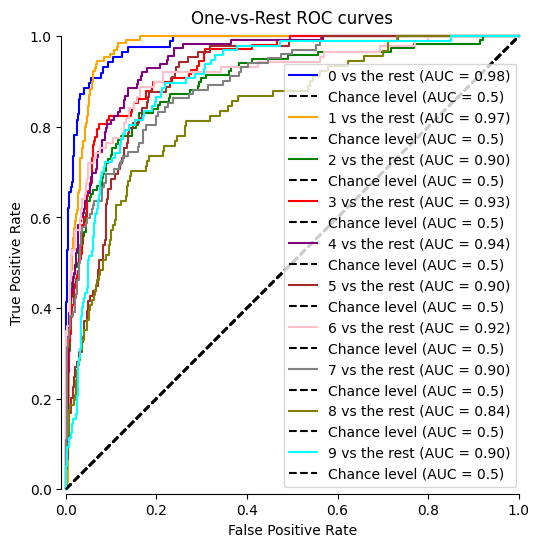

In [56]:
from sklearn.metrics import RocCurveDisplay


fig, ax = plt.subplots(figsize=(6, 6))

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]
for digit, color in zip(range(0, 10), colors):
    RocCurveDisplay.from_predictions(
        labels_test[:, digit],
        predictions[:, digit],
        name=f"{digit} vs the rest",
        curve_kwargs=dict(color=color),
        ax=ax,
        plot_chance_level=True,
        despine=True,
)
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves",
)